# Neural-Network with Numpy

In this notebook, you are going to write and implement all the components required to create and train a two-layered neural network using NumPy.

## Imports & Seeding:

Importing some common libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(123)
%matplotlib inline

## Preparing the data

You'll train and evaluate your model on [Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST) dataset. In this section, you'll download Fashion MNIST and split it into training and testing datasets.

In [2]:
from sklearn.datasets import fetch_openml

# Using `fetch_openml`, download `Fashion-MNIST` 
# and save the training data and labels in `X` and `y` respectively.
#############################
# Your code goes here (5 points)
dataset = fetch_openml(name='Fashion-MNIST')
X = dataset['data']
y = dataset.target
#############################

# Normalization:
X = ((X / 255.) - .5) * 2

print(X.shape, y.shape)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


In [3]:
from sklearn.model_selection import train_test_split

# Using `train_test_split`, split your data into two sets. 
# Set the test_size to 10000

#############################
# Your code goes here (6 points)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=10000)
#############################

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


## Prepare training & validation sets

We'll use only 3 classes from Fashion MNIST: Trouser, T-shirt, and Sneaker classes.

The class labels for T-shirt, Trouser, and Sneaker are 0, 1, and 7 respectively.

In this part, you'll limit the testing and training sets to only these three classes.

In [4]:
# Modify `y_train` and `x_train`.
# Only keep the 3 classes mentioned above. 
#############################
# Your code goes here (4 points)
indexes = (y_train == '0') | (y_train == '1') | (y_train == '7')
x_train = x_train[indexes].to_numpy()
y_train = y_train[indexes].to_numpy()
#############################

print(x_train.shape, y_train.shape)

(18017, 784) (18017,)


In [5]:
# Modify `y_test` and `x_test`.
# Only keep the 3 classes mentioned above. 
#############################
# Your code goes here (4 points)
indexes = (y_test == '0') | (y_test == '1') | (y_test == '7')
x_test = x_test[indexes].to_numpy()
y_test = y_test[indexes].to_numpy()
#############################

print(x_test.shape, y_test.shape)

(2983, 784) (2983,)


## Linear & Activation Functions

In this part, you'll implement the forward and backward process for the following components:
- Softmax Layer
- Linear Layer
- ReLU Layer
- Sigmoid Layer

### The `Softmax` Layer

In [6]:
class SoftMaxLayer(object):
    def __init__(self):
        self.inp = None
        self.output = None

    def forward(self, x):
        # Write the forward pass for softmax.
        # Save the values required for the backward pass.
        #############################
        # Your code goes here (4 points)
        self.inp = x
        exp = np.exp(self.inp)
        self.output = exp / np.sum(exp, axis = 1, keepdims = True)
        #############################
        return self.output

    def backward(self, up_grad):
        # Write the backward pass for softmax.
        #############################
        # Your code goes here (4 points)

        #Used Jacobian-based approach 
        N = up_grad.shape[0]
        dx = np.zeros_like(up_grad)

        for i in range(N):
            J = np.diag(self.output[i]) - np.outer(self.output[i], self.output[i])
            dx[i] = np.dot(J, up_grad[i])
        return dx
        #############################

    def step(self, optimizer):
      pass

### The `Linear` Layer 

In [7]:
class Linear:
    def __init__(self, in_dim, out_dim):
        # Initialize the layer's weights and biases
        #############################
        # Your code goes here (2 points)
        #Xavier initialization
        std = np.sqrt(2.0 / (in_dim + out_dim))
        self.w = np.random.normal(0, std, size=(in_dim, out_dim))
        self.b = np.zeros((1, out_dim))
        #############################
        self.dw = None
        self.db = None
        
    def forward(self, inp):
        # Compute linear layer's output.
        # Save the value(s) required for the backward phase.
        #############################
        # Your code goes here (4 points)
        self.inp = inp
        z = np.dot(self.inp, self.w) + self.b
        #############################
        
        return z
    
    def backward(self, up_grad):
        # Calculate the gradient with respect to the weights 
        # and biases and save the results.
        #############################
        # Your code goes here (6 points)
        self.dw = np.matmul(self.inp.T, up_grad).mean(axis=0)
        self.db = np.mean(up_grad, axis=0, keepdims=True)
        down_grad = np.dot(up_grad, self.w.T)
        #############################
        return down_grad

    def step(self, optimizer):
      # Update the layer's weights and biases
      # Update previous_w_update and previous_b_update accordingly
      #############################
      # Your code goes here (5 points)
        self.w -= optimizer.lr * self.dw
        self.b -= optimizer.lr * self.db
      #############################

### The `ReLU` Layer

In [8]:
class RelU:
    def __init__(self):
        self.inp = None
        self.mask = None

    def forward(self, inp):
        # Write the forward pass for ReLU.
        # Save the value(s) required for the backward pass.
        #############################
        # Your code goes here (4 points)
        self.mask = inp > 0
        output = inp * self.mask
        self.inp = inp
        #############################
        return output
    
    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        down_grad = up_grad * self.mask
        #############################
        return down_grad

    def step(self, optimizer):
      pass

### The `sigmoid` Layer

In [9]:
class Sigmoid:
    def forward(self, inp):
        #############################
        # Your code goes here (4 points)
        self.out = 1 / (1 + np.exp(-inp))
        #############################
        return self.out
    
    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        down_grad = self.out * (1 - self.out) * up_grad
        #############################
        return down_grad
    
    def step(self, optimizer):
      pass

## `Loss` function :

For this task we are going to use the [Cross-Entropy Loss](https://en.wikipedia.org/wiki/Cross_entropy).

In [10]:
class CELoss():
    def __init__(self):
      pass

    def forward(self, pred, target):
        
        self.yhat = pred
        self.y = target
        m = self.y.shape[0]
        # Commpute and return the loss 
        #############################
        # Your code goes here (8 points)
        loss = (-1/m) * np.sum(self.y * np.log(self.yhat))
        return loss
        #############################
        
    
    def backward(self):
        # Derivative of loss_fn with respect to a the predicted label.
        # Use `self.y` and `self.yhat` to compute and return `grad`.
        #############################
        # Your code goes here (6 points)
        m = self.y.shape[0]
        grad = (-1/m) * (self.y / (self.yhat))
        #############################
        return grad

## Optimizer

In this section, you'll implement an optimizer classes


In [11]:
class GradientDescent(object):
    def __init__(self, lr):
        self.lr = lr

    def get_next_update(self, x, dx):
        # Compute the new value for 'x' and return the result
        #############################
        # Your code goes here (2 points)
        return x - self.lr * dx
        #############################

## The Model
Now you'll write the base class for a multi-layer perceptron network.

In [12]:
class MLP:
    def __init__(self, layers, loss_fn, optimizer):
        self.layers = layers 
        self.losses  = [] 
        self.loss_fn = loss_fn
        self.optimizer = optimizer

    def forward(self, inp):
        # Pass `inp` to all the layers sequentially
        # and return the result.
        #############################
        # Your code goes here (4 points)
        x = inp
        for layer in self.layers:
            x = layer.forward(x)
        return x
        #############################
        
    def loss(self, pred, label):
        loss = self.loss_fn.forward(pred, label)
        self.losses.append(loss)
        return loss

    def backward(self):
        # Start with loss function's gradient and 
        # do the backward pass on all the layers.
        #############################
        # Your code goes here (5 points)
        up_grad = self.loss_fn.backward()
        for layer in reversed(self.layers):
            up_grad = layer.backward(up_grad)
        #############################
        
    def update(self):
        for layer in self.layers:
          layer.step(self.optimizer)

The following cell encodes training labels into a one-hot representation with 3 classes.

In [13]:
def onehot_enc(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    map = list(set(list(y)))
    for i, val in enumerate(y):
        ary[i, map.index(val)] = 1
    return ary

y_train = onehot_enc(y_train, 3)

In [14]:
def train(model, epochs, x, y):
    for n in range(epochs):
      # First do the forward pass. Next, compute the loss.
      # Then do the backward pass and finally, update the parameters.
      #############################
      # Your code goes here (4 points)
      pred = model.forward(x)
      loss = model.loss(pred,y)
      model.backward()
      model.update()
      #############################
      print(f"Loss at {n}: {loss:.3f}")

In [15]:
# Instantiate the `MLP` with the following structure:
#     Linear with 50 units --> ReLU --> Linear with 50 units --> ReLU --> Linear with 3 units --> Sigmoid --> Softmax
# Use GradientDescent as the optimizer, set the learning rate to 0.001, and use CELoss as the loss function.
#############################
# Your code goes here (4 points)
layers = [ Linear(784,50)
          ,RelU(),
          Linear(50,50),
          RelU(),
          Linear(50,3),
          Sigmoid(),
          SoftMaxLayer()]
loss = CELoss()
optimizer=GradientDescent(0.001)
nn = MLP(layers,loss,optimizer)
#############################

epochs = 50

# Train the network using only `x_train` and `y_train` (no validation)
train(nn, epochs, x_train, y_train)

Loss at 0: 1.028
Loss at 1: 1.026
Loss at 2: 1.024
Loss at 3: 1.022
Loss at 4: 1.020
Loss at 5: 1.019
Loss at 6: 1.017
Loss at 7: 1.015
Loss at 8: 1.013
Loss at 9: 1.012
Loss at 10: 1.010
Loss at 11: 1.008
Loss at 12: 1.007
Loss at 13: 1.005
Loss at 14: 1.003
Loss at 15: 1.002
Loss at 16: 1.000
Loss at 17: 0.998
Loss at 18: 0.997
Loss at 19: 0.995
Loss at 20: 0.993
Loss at 21: 0.992
Loss at 22: 0.990
Loss at 23: 0.989
Loss at 24: 0.987
Loss at 25: 0.986
Loss at 26: 0.984
Loss at 27: 0.983
Loss at 28: 0.981
Loss at 29: 0.979
Loss at 30: 0.978
Loss at 31: 0.976
Loss at 32: 0.975
Loss at 33: 0.974
Loss at 34: 0.972
Loss at 35: 0.971
Loss at 36: 0.969
Loss at 37: 0.968
Loss at 38: 0.966
Loss at 39: 0.965
Loss at 40: 0.964
Loss at 41: 0.962
Loss at 42: 0.961
Loss at 43: 0.959
Loss at 44: 0.958
Loss at 45: 0.957
Loss at 46: 0.955
Loss at 47: 0.954
Loss at 48: 0.953
Loss at 49: 0.951


Let's plot the loss value for each iteration

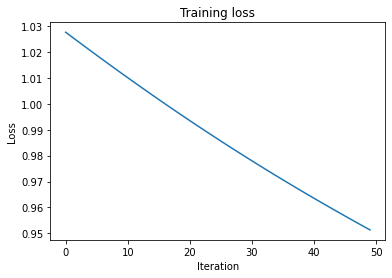

In [16]:
plt.plot(nn.losses)
plt.title("Training loss")
plt.xlabel("Iteration")
plt.ylabel("Loss");

**Let's also check our model's performance using the `accuracy` metric on the `testing` dataset**

In [34]:
y_test = onehot_enc(y_test, 3)

In [17]:
# Compute the accuracy on the testing set
#############################
# # Your code goes here (7 points)
correct = 0
total = 0
pred=nn.forward(x_test)
for i in range(len(y_test)):
    labels = np.argmax(y_test[i])
    predicted = np.argmax(pred[i])
    correct += (predicted == labels).sum().item()
    total +=1
acc = correct/total
#############################

print(acc)

0.8209855849815622
